In [1]:
from rdkit import Chem
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, ShuffleSplit, GridSearchCV, cross_val_score, cross_validate
import os
import glob
from scipy.stats import norm
import math
import random

In [2]:
from sklearn.neural_network import MLPRegressor
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error 
#Read the data  读入PLQY数值

T_0 = pd.read_excel('AIE727y.xlsx')
T=np.array(T_0)



print(T)  
print(len(T))

[[1]
 [1]
 [1]
 ...
 [0]
 [0]
 [0]]
3074


In [3]:
#读入特征    1000种描述符数据 
X=pd.read_excel('AIE727x.xlsx')
X=np.array(X) 

print(X)
print(len(X[0]))
print(len(X))

[[ 0  0  0 ...  0  0 42]
 [ 0  0  1 ...  0  0 10]
 [ 0  0  1 ...  0  0 10]
 ...
 [ 0  0  0 ...  0  0 13]
 [ 0  0  0 ...  0  0 13]
 [ 1  0  0 ...  0  0 13]]
1638
3074


In [4]:
from sklearn.model_selection import train_test_split
X_train,  X_test,  T_train,  T_test  =  train_test_split(X,T,test_size=0.10,random_state=11)

In [5]:
from sklearn.metrics import accuracy_score,precision_score,f1_score
import lightgbm as lgbm

clf=lgbm.LGBMClassifier(boosting_type='gbdt',colsample_bytree=0.6,feature_fraction=0.7,bagging_fraction=0.1,num_leaves=10,min_child_samples=70,max_depth=-1,
                        learning_rate=0.05,n_estimators=800)
clf.fit(X_train,T_train)


/home/rdkit/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rdkit/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] bagging_fraction is set=0.1, subsample=1.0 will be ignored. Current value: bagging_fraction=0.1
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=0.6 will be ignored. Current value: feature_fraction=0.7


LGBMClassifier(bagging_fraction=0.1, colsample_bytree=0.6, feature_fraction=0.7,
               learning_rate=0.05, min_child_samples=70, n_estimators=800,
               num_leaves=10)

In [6]:
import pandas as pd
import numpy as np
import time
import logging
import os, sys
import psutil
import lightgbm as lgb
from datetime import datetime

from itertools import cycle
from sklearn import svm
from sklearn.metrics import *

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
#from sklearn.externals import joblib
from scipy import interp

T_pred = clf.predict(X_test)
confusion_matrix(T_test, T_pred)

array([[161,   4],
       [  4, 139]])

In [7]:
print (classification_report(T_test, T_pred , digits=4))

              precision    recall  f1-score   support

           0     0.9758    0.9758    0.9758       165
           1     0.9720    0.9720    0.9720       143

    accuracy                         0.9740       308
   macro avg     0.9739    0.9739    0.9739       308
weighted avg     0.9740    0.9740    0.9740       308



In [8]:
f1=f1_score(T_test,T_pred,average='micro')
print("the f1 score: %.3f"%f1)

the f1 score: 0.974


<Figure size 1000x1000 with 0 Axes>

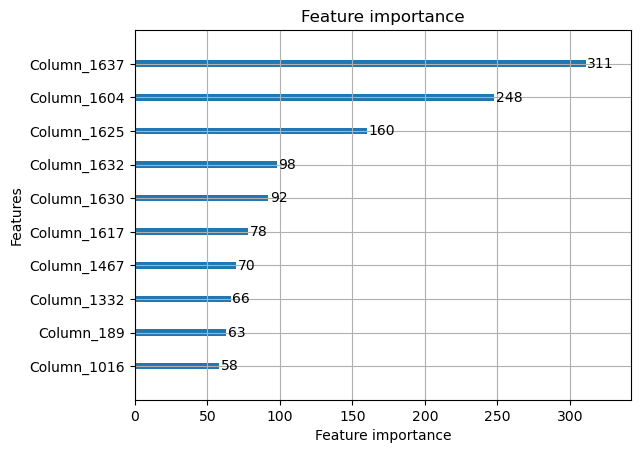

In [9]:
from lightgbm import plot_importance
# 显示重要特征
fig = plt.figure(figsize=(10,10))
plot_importance(clf,max_num_features=10)
plt.show()

In [10]:
T_pred = clf.predict(X_train)
confusion_matrix(T_train, T_pred)

array([[1448,    1],
       [   0, 1317]])

In [12]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='liblinear',multi_class='ovr', C = 5, verbose = 10, max_iter=600)
clf.fit(X_train, T_train)

/home/rdkit/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LibLinear]iter  1 act 2.389e+03 pre 2.039e+03 delta 1.937e-01 f 9.586e+03 |g| 7.711e+04 CG   3
cg reaches trust region boundary
iter  2 act 1.074e+03 pre 9.729e+02 delta 2.845e-01 f 7.197e+03 |g| 3.131e+04 CG   3
cg reaches trust region boundary
iter  3 act 7.065e+02 pre 6.264e+02 delta 3.387e-01 f 6.123e+03 |g| 1.098e+04 CG   3
cg reaches trust region boundary
iter  4 act 8.368e+02 pre 8.438e+02 delta 4.951e-01 f 5.416e+03 |g| 7.894e+03 CG   4
cg reaches trust region boundary
iter  5 act 6.753e+02 pre 6.215e+02 delta 7.313e-01 f 4.580e+03 |g| 3.664e+03 CG   4
cg reaches trust region boundary
iter  6 act 6.124e+02 pre 5.795e+02 delta 8.024e-01 f 3.904e+03 |g| 3.115e+03 CG   5
cg reaches trust region boundary
iter  7 act 6.696e+02 pre 6.023e+02 delta 1.157e+00 f 3.292e+03 |g| 2.662e+03 CG   6
cg reaches trust region boundary
iter  8 act 5.233e+02 pre 4.589e+02 delta 1.572e+00 f 2.622e+03 |g| 1.801e+03 CG   6
cg reaches trust region boundary
iter  9 act 4.934e+02 pre 4.545e+02 delta 1.9

LogisticRegression(C=5, max_iter=600, multi_class='ovr', solver='liblinear',
                   verbose=10)

In [809]:
import sklearn.neural_network as sk_nn
clf = sk_nn.MLPClassifier(activation='relu',solver='adam',alpha=1,learning_rate='adaptive',learning_rate_init=0.1,max_iter=800)
clf.fit(X_train,T_train)


/PUBLIC/zyh/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='relu', alpha=1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='adaptive',
       learning_rate_init=0.1, max_iter=800, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [814]:
T_pred = clf.predict(X_train)
confusion_matrix(T_train, T_pred)

array([[1449,    0],
       [  92, 1225]])

In [815]:
T_pred = clf.predict(X_test)
confusion_matrix(T_test, T_pred)

array([[162,   3],
       [ 18, 125]])

In [816]:
print (classification_report(T_test, T_pred , digits=4))

              precision    recall  f1-score   support

           0     0.9000    0.9818    0.9391       165
           1     0.9766    0.8741    0.9225       143

   micro avg     0.9318    0.9318    0.9318       308
   macro avg     0.9383    0.9280    0.9308       308
weighted avg     0.9355    0.9318    0.9314       308



In [13]:
import sklearn.neighbors as sk_neighbors
clf = sk_neighbors.KNeighborsClassifier(n_neighbors=2) 
clf.fit(X_train,T_train)

/home/rdkit/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=2)

In [21]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier (
bootstrap=True, max_depth=None,
max_features='auto', max_leaf_nodes=None,
min_impurity_decrease=0.0,
min_samples_leaf=1, min_samples_split=12,
min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=2,
oob_score=False, random_state=725, verbose=0, warm_start=False)
clf.fit(X_train,T_train) # 使用训练集训练模型
T_pre = clf.predict(X_test) # 使用模型对测试集进行预测

/tmp/ipykernel_34321/799606017.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,T_train) # 使用训练集训练模型


In [7]:
from sklearn.tree import DecisionTreeClassifier
 
clf = DecisionTreeClassifier(criterion="gini",
                         splitter="best",
                         max_depth=None,
                         min_samples_split=50,
                         min_samples_leaf=10,
                         min_weight_fraction_leaf=0.,
                         max_features=0.6,
                         random_state=2,
                         max_leaf_nodes=None,
                         min_impurity_decrease=0)
clf.fit(X_train,T_train) # 使用训练集训练模型
T_pre = clf.predict(X_test) # 使用模型对测试集进行预测